# Overview

1. Exploratory Data Analysis 
  - Combine data 
  - Handling missing values 
  - Handling outlier
  - Bivariate/Multivaraite Plot  
  - Correlation plot  
2. Feature Engineer 
3. Modele selection and parameter tuning (Cross Validation) 
  - linear regression 
  - knn 
  - tree-based 
  - svm 
4. Result & Conclusion 


## Exploratory Data Analysis

In [79]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [372]:
test = pd.read_csv('application_test.csv')
train = pd.read_csv('application_train.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')
bureau = pd.read_csv('bureau.csv')
creadit_card_balance = pd.read_csv('credit_card_balance.csv')
installments_payments = pd.read_csv('installments_payments.csv') 
POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv')
previous_application = pd.read_csv('previous_application.csv')

In [373]:
test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [230]:
test['SK_ID_CURR'][1] in bureau['SK_ID_CURR'].unique()

True

In [231]:
# Create a function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [232]:
# Missing values statistics
missing_values = missing_values_table(train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [233]:
# Number of each type of column
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [234]:
# Number of unique classes in each object column
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [235]:
# Create a label encoder object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            # Train on the training data
            le.fit(train[col])
            # Transform both training and testing data
            train[col] = le.transform(train[col])
            test[col] = le.transform(test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [236]:
# one-hot encoding of categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [237]:
# Aligning Training and Testing Data
train_labels = train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
train, test = train.align(test, join = 'inner', axis = 1)

# Add the target back in
train['TARGET'] = train_labels

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [238]:
# Find Anomalies
(train['DAYS_BIRTH'] / -365).describe()
# There are no outliers for the age on either the high or low end

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [239]:
train['DAYS_EMPLOYED'].describe()
# The maximum value (besides being positive) is about 1000 years.

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days Employment')

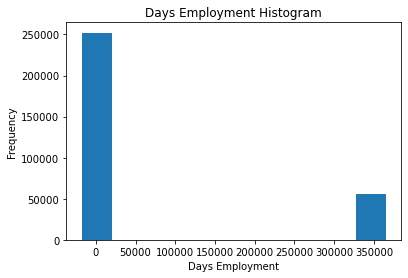

In [240]:
train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [241]:
# Subset the anomalous clients and see if they tend to have higher or low rates 
# of default than the rest of the clients.
anom = train[train['DAYS_EMPLOYED'] == 365243]
non_anom = train[train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


It turns out that the anomalies have a lower rate of default.

Handling the anomalies depends on the exact situation, with no set rules. One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common. 

The anomalous values seem to have some importance, so we want to tell the machine learning model if we did in fact fill in these values. As a solution, we will fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.

Text(0.5, 0, 'Days Employment')

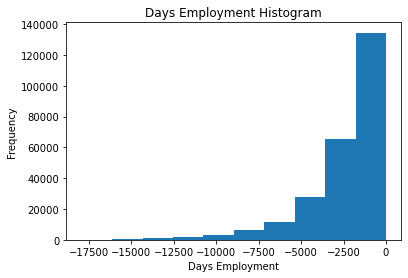

In [242]:
# Create an anomalous flag column
train['DAYS_EMPLOYED_ANOM'] = train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [243]:
# create a column to indicate whether it's amomalies or not
test['DAYS_EMPLOYED_ANOM'] = test["DAYS_EMPLOYED"] == 365243
test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (
    test["DAYS_EMPLOYED_ANOM"].sum(), len(test)))

There are 9274 anomalies in the test data out of 48744 entries


In [244]:
# Find correlations with the target and sort
correlations = train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

The `DAYS_BIRTH` is the most positive correlation. 

Looking at the documentation, `DAYS_BIRTH` is the age in days of the client at the time of the loan in negative days. The correlation is positive, but the value of this feature is negative, meaning that as the client gets older, they are less likely to default on their loan (i.e., the target == 0). 


Text(0.5, 1.0, 'Distribution of Ages')

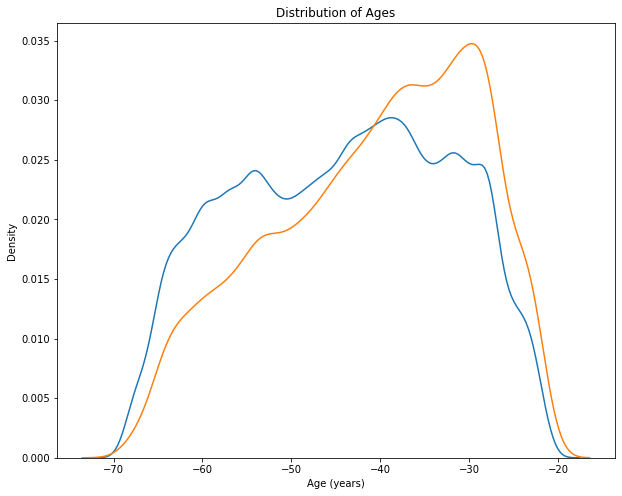

In [245]:
# Make a kernel density estimation plot (KDE) colored by values of the target
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')

The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target.


Exterior Sources
The 3 variables with the strongest negative correlations with the target are `EXT_SOURCE_1`, `EXT_SOURCE_2`, and `EXT_SOURCE_3`. According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data.

Let's take a look at these variables.

First, we can show the correlations of the `EXT_SOURCE` features with the target and with each other.

In [246]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 
                  'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

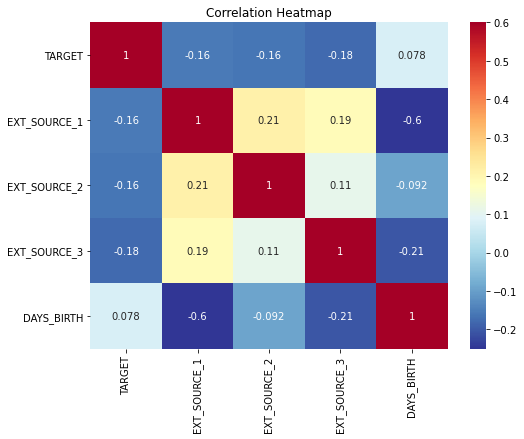

In [247]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, 
            vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

All three EXT_SOURCE featureshave negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan. We can also see that `DAYS_BIRTH` is positively correlated with `EXT_SOURCE_1` indicating that maybe one of the factors in this score is the client age.

Next we can look at the distribution of each of these features colored by the value of the target. This will let us visualize the effect of this variable on the target.

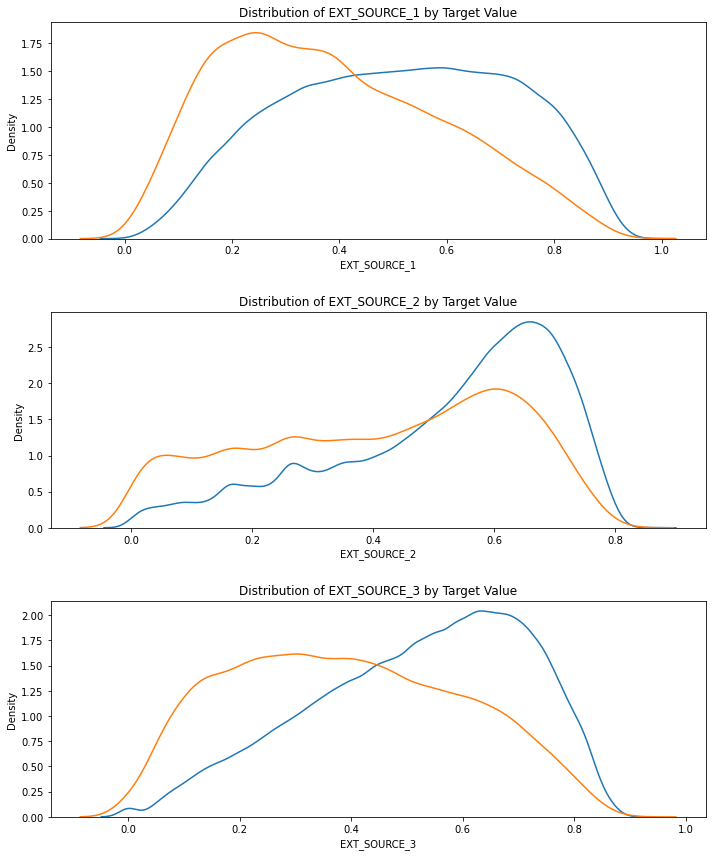

In [248]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(train.loc[train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(train.loc[train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

`EXT_SOURCE_3` displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong (in fact they are all considered very weak, but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

In [249]:
train.loc[train['DAYS_EMPLOYED_ANOM'] == False, ['DAYS_EMPLOYED_ANOM']] = 0
train.loc[train['DAYS_EMPLOYED_ANOM'] == True, ['DAYS_EMPLOYED_ANOM']] = 1

test.loc[test['DAYS_EMPLOYED_ANOM'] == False, ['DAYS_EMPLOYED_ANOM']] = 0
test.loc[test['DAYS_EMPLOYED_ANOM'] == True, ['DAYS_EMPLOYED_ANOM']] = 1

In [250]:
train

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,1,0,1,0,1,0
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,0,0,0,0,1,0,0,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,...,0,0,0,0,1,0,1,0,0,0
307507,456252,0,0,1,0,72000.0,269550.0,12001.5,225000.0,0.025164,...,0,0,0,0,1,0,1,0,0,1
307508,456253,0,0,1,0,153000.0,677664.0,29979.0,585000.0,0.005002,...,0,0,0,1,0,0,1,0,0,0
307509,456254,0,0,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,...,0,0,0,0,1,0,1,0,1,0


In [251]:
test

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0,0,0,0,0,1,0,1,0,0
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,0,0,0,0,0,0,0
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0,0,0,0,1,0,0,1,0,0
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,1,0,121500.0,412560.0,17473.5,270000.0,0.002042,...,0,0,0,0,0,0,0,0,0,0
48740,456222,0,0,0,2,157500.0,622413.0,31909.5,495000.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
48741,456223,0,1,1,1,202500.0,315000.0,33205.5,315000.0,0.026392,...,0,0,0,0,0,1,0,1,0,0
48742,456224,0,0,0,0,225000.0,450000.0,25128.0,450000.0,0.018850,...,0,0,0,0,1,0,0,1,0,0


## Bureau and Bureau_balance data Combination 

In [253]:
bureau_balance
# creadit_card_balance 
# installments_payments 
# POS_CASH_balance
# previous_application

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [254]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [255]:
# Groupby the client id (SK_ID_CURR), calculate aggregated statistics from the Bureau information 
bureau_previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})

bureau_previous_loan_counts

,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3
...,...,...
305806,456249,13
305807,456250,3
305808,456253,4
305809,456254,1


In [256]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [257]:
def agg_numeric(df, group_var, agg_funcs=['count', 'mean', 'max', 'min', 'sum']):
    agg = df.groupby(group_var).agg(agg_funcs).reset_index()
    agg.columns = ['_'.join(col).strip() for col in agg.columns.values]

    return agg

In [258]:
bureau_agg = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), group_var='SK_ID_CURR')

bureau_agg

/var/folders/wp/6_zz4vgs79ndjls9bw_j54s80000gn/T/ipykernel_4066/2700363865.py:2: FutureWarning: ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg = df.groupby(group_var).agg(agg_funcs).reset_index()


,SK_ID_CURR_,DAYS_CREDIT_count,DAYS_CREDIT_mean,DAYS_CREDIT_max,DAYS_CREDIT_min,DAYS_CREDIT_sum,CREDIT_DAY_OVERDUE_count,CREDIT_DAY_OVERDUE_mean,CREDIT_DAY_OVERDUE_max,CREDIT_DAY_OVERDUE_min,...,DAYS_CREDIT_UPDATE_count,DAYS_CREDIT_UPDATE_mean,DAYS_CREDIT_UPDATE_max,DAYS_CREDIT_UPDATE_min,DAYS_CREDIT_UPDATE_sum,AMT_ANNUITY_count,AMT_ANNUITY_mean,AMT_ANNUITY_max,AMT_ANNUITY_min,AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.000,24817.500
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.000,0.000
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,0.000
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,0.000
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.000,4261.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,13,-1667.076923,-483,-2713,-21672,13,0.0,0,0,...,13,-1064.538462,-12,-2498,-13839,0,NaN,NaN,NaN,0.000
305807,456250,3,-862.000000,-760,-1002,-2586,3,0.0,0,0,...,3,-60.333333,-23,-127,-181,3,154567.965000,384147.0,27757.395,463703.895
305808,456253,4,-867.500000,-713,-919,-3470,4,0.0,0,0,...,4,-253.250000,-5,-701,-1013,3,58369.500000,58369.5,58369.500,175108.500
305809,456254,1,-1104.000000,-1104,-1104,-1104,1,0.0,0,0,...,1,-401.000000,-401,-401,-401,1,0.000000,0.0,0.000,0.000


In [259]:
def agg_categorical(df, group_var, agg_funcs=['sum', 'count','mean']):
    cat = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    cat[group_var] = df[group_var]
    cat = cat.groupby(group_var).agg(agg_funcs).reset_index()      
    cat.columns = ['_'.join(col).strip() for col in cat.columns.values]

    return cat

In [260]:
bureau_counts = agg_categorical(bureau, group_var = 'SK_ID_CURR')
bureau_counts

,SK_ID_CURR_,CREDIT_ACTIVE_Active_sum,CREDIT_ACTIVE_Active_count,CREDIT_ACTIVE_Active_mean,CREDIT_ACTIVE_Bad debt_sum,CREDIT_ACTIVE_Bad debt_count,CREDIT_ACTIVE_Bad debt_mean,CREDIT_ACTIVE_Closed_sum,CREDIT_ACTIVE_Closed_count,CREDIT_ACTIVE_Closed_mean,...,CREDIT_TYPE_Mobile operator loan_mean,CREDIT_TYPE_Mortgage_sum,CREDIT_TYPE_Mortgage_count,CREDIT_TYPE_Mortgage_mean,CREDIT_TYPE_Real estate loan_sum,CREDIT_TYPE_Real estate loan_count,CREDIT_TYPE_Real estate loan_mean,CREDIT_TYPE_Unknown type of loan_sum,CREDIT_TYPE_Unknown type of loan_count,CREDIT_TYPE_Unknown type of loan_mean
0,100001,3,7,0.428571,0,7,0.0,4,7,0.571429,...,0.0,0,7,0.0,0,7,0.0,0,7,0.0
1,100002,2,8,0.250000,0,8,0.0,6,8,0.750000,...,0.0,0,8,0.0,0,8,0.0,0,8,0.0
2,100003,1,4,0.250000,0,4,0.0,3,4,0.750000,...,0.0,0,4,0.0,0,4,0.0,0,4,0.0
3,100004,0,2,0.000000,0,2,0.0,2,2,1.000000,...,0.0,0,2,0.0,0,2,0.0,0,2,0.0
4,100005,2,3,0.666667,0,3,0.0,1,3,0.333333,...,0.0,0,3,0.0,0,3,0.0,0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,2,13,0.153846,0,13,0.0,11,13,0.846154,...,0.0,0,13,0.0,0,13,0.0,0,13,0.0
305807,456250,2,3,0.666667,0,3,0.0,1,3,0.333333,...,0.0,0,3,0.0,0,3,0.0,0,3,0.0
305808,456253,2,4,0.500000,0,4,0.0,2,4,0.500000,...,0.0,0,4,0.0,0,4,0.0,0,4,0.0
305809,456254,0,1,0.000000,0,1,0.0,1,1,1.000000,...,0.0,0,1,0.0,0,1,0.0,0,1,0.0


In [261]:
#### Working with bureau balance 
bureau_balance

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [262]:
bureau_balance_counts = agg_categorical(bureau_balance, group_var = 'SK_ID_BUREAU')
bureau_balance_counts

,SK_ID_BUREAU_,STATUS_0_sum,STATUS_0_count,STATUS_0_mean,STATUS_1_sum,STATUS_1_count,STATUS_1_mean,STATUS_2_sum,STATUS_2_count,STATUS_2_mean,...,STATUS_4_mean,STATUS_5_sum,STATUS_5_count,STATUS_5_mean,STATUS_C_sum,STATUS_C_count,STATUS_C_mean,STATUS_X_sum,STATUS_X_count,STATUS_X_mean
0,5001709,0,97,0.000000,0,97,0.000000,0,97,0.0,...,0.0,0,97,0.0,86,97,0.886598,11,97,0.113402
1,5001710,5,83,0.060241,0,83,0.000000,0,83,0.0,...,0.0,0,83,0.0,48,83,0.578313,30,83,0.361446
2,5001711,3,4,0.750000,0,4,0.000000,0,4,0.0,...,0.0,0,4,0.0,0,4,0.000000,1,4,0.250000
3,5001712,10,19,0.526316,0,19,0.000000,0,19,0.0,...,0.0,0,19,0.0,9,19,0.473684,0,19,0.000000
4,5001713,0,22,0.000000,0,22,0.000000,0,22,0.0,...,0.0,0,22,0.0,0,22,0.000000,22,22,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817390,6842884,9,48,0.187500,0,48,0.000000,0,48,0.0,...,0.0,0,48,0.0,20,48,0.416667,19,48,0.395833
817391,6842885,12,24,0.500000,0,24,0.000000,0,24,0.0,...,0.0,12,24,0.5,0,24,0.000000,0,24,0.000000
817392,6842886,8,33,0.242424,0,33,0.000000,0,33,0.0,...,0.0,0,33,0.0,25,33,0.757576,0,33,0.000000
817393,6842887,6,37,0.162162,0,37,0.000000,0,37,0.0,...,0.0,0,37,0.0,31,37,0.837838,0,37,0.000000


In [263]:
bureau_balance_agg = agg_numeric(bureau_balance, group_var = 'SK_ID_BUREAU')
bureau_balance_agg

/var/folders/wp/6_zz4vgs79ndjls9bw_j54s80000gn/T/ipykernel_4066/2700363865.py:2: FutureWarning: ['STATUS'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg = df.groupby(group_var).agg(agg_funcs).reset_index()


,SK_ID_BUREAU_,MONTHS_BALANCE_count,MONTHS_BALANCE_mean,MONTHS_BALANCE_max,MONTHS_BALANCE_min,MONTHS_BALANCE_sum
0,5001709,97,-48.0,0,-96,-4656
1,5001710,83,-41.0,0,-82,-3403
2,5001711,4,-1.5,0,-3,-6
3,5001712,19,-9.0,0,-18,-171
4,5001713,22,-10.5,0,-21,-231
...,...,...,...,...,...,...
817390,6842884,48,-23.5,0,-47,-1128
817391,6842885,24,-11.5,0,-23,-276
817392,6842886,33,-16.0,0,-32,-528
817393,6842887,37,-18.0,0,-36,-666


In [ ]:
# The above dataframes have the calculations done on each loan. Now we need to aggregate 
# these for each client. We can do this by merging the dataframes together first and then 
# since all the variables are numeric, we just need to aggregate the statistics again, 
# this time grouping by the SK_ID_CURR.The above dataframes have the calculations done on 
# each loan. Now we need to aggregate these for each client. We can do this by merging the
# dataframes together first and then since all the variables are numeric, we just need to
# aggregate the statistics again, this time grouping by the SK_ID_CURR.

# Dataframe grouped by the loan
# bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index = True, left_on = 'SK_ID_BUREAU_', how = 'outer')
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts)
bureau_by_loan

In [265]:
bureau_by_loan = bureau_by_loan.rename(columns={'SK_ID_BUREAU_':'SK_ID_BUREAU'})
bureau_by_loan

,SK_ID_BUREAU,MONTHS_BALANCE_count,MONTHS_BALANCE_mean,MONTHS_BALANCE_max,MONTHS_BALANCE_min,MONTHS_BALANCE_sum,STATUS_0_sum,STATUS_0_count,STATUS_0_mean,STATUS_1_sum,...,STATUS_4_mean,STATUS_5_sum,STATUS_5_count,STATUS_5_mean,STATUS_C_sum,STATUS_C_count,STATUS_C_mean,STATUS_X_sum,STATUS_X_count,STATUS_X_mean
0,5001709,97,-48.0,0,-96,-4656,0,97,0.000000,0,...,0.0,0,97,0.0,86,97,0.886598,11,97,0.113402
1,5001710,83,-41.0,0,-82,-3403,5,83,0.060241,0,...,0.0,0,83,0.0,48,83,0.578313,30,83,0.361446
2,5001711,4,-1.5,0,-3,-6,3,4,0.750000,0,...,0.0,0,4,0.0,0,4,0.000000,1,4,0.250000
3,5001712,19,-9.0,0,-18,-171,10,19,0.526316,0,...,0.0,0,19,0.0,9,19,0.473684,0,19,0.000000
4,5001713,22,-10.5,0,-21,-231,0,22,0.000000,0,...,0.0,0,22,0.0,0,22,0.000000,22,22,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817390,6842884,48,-23.5,0,-47,-1128,9,48,0.187500,0,...,0.0,0,48,0.0,20,48,0.416667,19,48,0.395833
817391,6842885,24,-11.5,0,-23,-276,12,24,0.500000,0,...,0.0,12,24,0.5,0,24,0.000000,0,24,0.000000
817392,6842886,33,-16.0,0,-32,-528,8,33,0.242424,0,...,0.0,0,33,0.0,25,33,0.757576,0,33,0.000000
817393,6842887,37,-18.0,0,-36,-666,6,37,0.162162,0,...,0.0,0,37,0.0,31,37,0.837838,0,37,0.000000


In [266]:
# Merge to include the SK_ID_CURR
bureau_by_loan = bureau_by_loan.merge(bureau[['SK_ID_BUREAU', 'SK_ID_CURR']], on = 'SK_ID_BUREAU', how = 'left')

bureau_by_loan

,SK_ID_BUREAU,MONTHS_BALANCE_count,MONTHS_BALANCE_mean,MONTHS_BALANCE_max,MONTHS_BALANCE_min,MONTHS_BALANCE_sum,STATUS_0_sum,STATUS_0_count,STATUS_0_mean,STATUS_1_sum,...,STATUS_5_sum,STATUS_5_count,STATUS_5_mean,STATUS_C_sum,STATUS_C_count,STATUS_C_mean,STATUS_X_sum,STATUS_X_count,STATUS_X_mean,SK_ID_CURR
0,5001709,97,-48.0,0,-96,-4656,0,97,0.000000,0,...,0,97,0.0,86,97,0.886598,11,97,0.113402,NaN
1,5001710,83,-41.0,0,-82,-3403,5,83,0.060241,0,...,0,83,0.0,48,83,0.578313,30,83,0.361446,162368.0
2,5001711,4,-1.5,0,-3,-6,3,4,0.750000,0,...,0,4,0.0,0,4,0.000000,1,4,0.250000,162368.0
3,5001712,19,-9.0,0,-18,-171,10,19,0.526316,0,...,0,19,0.0,9,19,0.473684,0,19,0.000000,162368.0
4,5001713,22,-10.5,0,-21,-231,0,22,0.000000,0,...,0,22,0.0,0,22,0.000000,22,22,1.000000,150635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817390,6842884,48,-23.5,0,-47,-1128,9,48,0.187500,0,...,0,48,0.0,20,48,0.416667,19,48,0.395833,387020.0
817391,6842885,24,-11.5,0,-23,-276,12,24,0.500000,0,...,12,24,0.5,0,24,0.000000,0,24,0.000000,387020.0
817392,6842886,33,-16.0,0,-32,-528,8,33,0.242424,0,...,0,33,0.0,25,33,0.757576,0,33,0.000000,387020.0
817393,6842887,37,-18.0,0,-36,-666,6,37,0.162162,0,...,0,37,0.0,31,37,0.837838,0,37,0.000000,387020.0


In [267]:
bureau_balance_by_client

,SK_ID_CURR,MONTHS_BALANCE_count_count,MONTHS_BALANCE_count_mean,MONTHS_BALANCE_count_max,MONTHS_BALANCE_count_min,MONTHS_BALANCE_count_sum,MONTHS_BALANCE_mean_count,MONTHS_BALANCE_mean_mean,MONTHS_BALANCE_mean_max,MONTHS_BALANCE_mean_min,...,STATUS_X_count_count,STATUS_X_count_mean,STATUS_X_count_max,STATUS_X_count_min,STATUS_X_count_sum,STATUS_X_mean_count,STATUS_X_mean_mean,STATUS_X_mean_max,STATUS_X_mean_min,STATUS_X_mean_sum
0,100001.0,7,24.571429,52,2,172,7,-11.785714,-0.5,-25.5,...,7,24.571429,52,2,172,7,0.214590,0.500000,0.000000,1.502129
1,100002.0,8,13.750000,22,4,110,8,-21.875000,-1.5,-39.5,...,8,13.750000,22,4,110,8,0.161932,0.500000,0.000000,1.295455
2,100005.0,3,7.000000,13,3,21,3,-3.000000,-1.0,-6.0,...,3,7.000000,13,3,21,3,0.136752,0.333333,0.000000,0.410256
3,100010.0,2,36.000000,36,36,72,2,-46.000000,-19.5,-72.5,...,2,36.000000,36,36,72,2,0.000000,0.000000,0.000000,0.000000
4,100013.0,4,57.500000,69,40,230,4,-28.250000,-19.5,-34.0,...,4,57.500000,69,40,230,4,0.254545,1.000000,0.000000,1.018182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134537,456247.0,11,29.090909,82,10,320,11,-19.863636,-4.5,-53.0,...,11,29.090909,82,10,320,11,0.168838,0.500000,0.000000,1.857222
134538,456250.0,3,29.000000,33,26,87,3,-14.000000,-12.5,-16.0,...,3,29.000000,33,26,87,3,0.617216,0.928571,0.000000,1.851648
134539,456253.0,4,29.250000,31,24,117,4,-14.125000,-11.5,-15.0,...,4,29.250000,31,24,117,4,0.135417,0.541667,0.000000,0.541667
134540,456254.0,1,37.000000,37,37,37,1,-18.000000,-18.0,-18.0,...,1,37.000000,37,37,37,1,0.000000,0.000000,0.000000,0.000000


In [268]:
bureau_by_loan

,SK_ID_BUREAU,MONTHS_BALANCE_count,MONTHS_BALANCE_mean,MONTHS_BALANCE_max,MONTHS_BALANCE_min,MONTHS_BALANCE_sum,STATUS_0_sum,STATUS_0_count,STATUS_0_mean,STATUS_1_sum,...,STATUS_5_sum,STATUS_5_count,STATUS_5_mean,STATUS_C_sum,STATUS_C_count,STATUS_C_mean,STATUS_X_sum,STATUS_X_count,STATUS_X_mean,SK_ID_CURR
0,5001709,97,-48.0,0,-96,-4656,0,97,0.000000,0,...,0,97,0.0,86,97,0.886598,11,97,0.113402,NaN
1,5001710,83,-41.0,0,-82,-3403,5,83,0.060241,0,...,0,83,0.0,48,83,0.578313,30,83,0.361446,162368.0
2,5001711,4,-1.5,0,-3,-6,3,4,0.750000,0,...,0,4,0.0,0,4,0.000000,1,4,0.250000,162368.0
3,5001712,19,-9.0,0,-18,-171,10,19,0.526316,0,...,0,19,0.0,9,19,0.473684,0,19,0.000000,162368.0
4,5001713,22,-10.5,0,-21,-231,0,22,0.000000,0,...,0,22,0.0,0,22,0.000000,22,22,1.000000,150635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817390,6842884,48,-23.5,0,-47,-1128,9,48,0.187500,0,...,0,48,0.0,20,48,0.416667,19,48,0.395833,387020.0
817391,6842885,24,-11.5,0,-23,-276,12,24,0.500000,0,...,12,24,0.5,0,24,0.000000,0,24,0.000000,387020.0
817392,6842886,33,-16.0,0,-32,-528,8,33,0.242424,0,...,0,33,0.0,25,33,0.757576,0,33,0.000000,387020.0
817393,6842887,37,-18.0,0,-36,-666,6,37,0.162162,0,...,0,37,0.0,31,37,0.837838,0,37,0.000000,387020.0


In [269]:
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR')
bureau_balance_by_client

,SK_ID_CURR_,MONTHS_BALANCE_count_count,MONTHS_BALANCE_count_mean,MONTHS_BALANCE_count_max,MONTHS_BALANCE_count_min,MONTHS_BALANCE_count_sum,MONTHS_BALANCE_mean_count,MONTHS_BALANCE_mean_mean,MONTHS_BALANCE_mean_max,MONTHS_BALANCE_mean_min,...,STATUS_X_count_count,STATUS_X_count_mean,STATUS_X_count_max,STATUS_X_count_min,STATUS_X_count_sum,STATUS_X_mean_count,STATUS_X_mean_mean,STATUS_X_mean_max,STATUS_X_mean_min,STATUS_X_mean_sum
0,100001.0,7,24.571429,52,2,172,7,-11.785714,-0.5,-25.5,...,7,24.571429,52,2,172,7,0.214590,0.500000,0.000000,1.502129
1,100002.0,8,13.750000,22,4,110,8,-21.875000,-1.5,-39.5,...,8,13.750000,22,4,110,8,0.161932,0.500000,0.000000,1.295455
2,100005.0,3,7.000000,13,3,21,3,-3.000000,-1.0,-6.0,...,3,7.000000,13,3,21,3,0.136752,0.333333,0.000000,0.410256
3,100010.0,2,36.000000,36,36,72,2,-46.000000,-19.5,-72.5,...,2,36.000000,36,36,72,2,0.000000,0.000000,0.000000,0.000000
4,100013.0,4,57.500000,69,40,230,4,-28.250000,-19.5,-34.0,...,4,57.500000,69,40,230,4,0.254545,1.000000,0.000000,1.018182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134537,456247.0,11,29.090909,82,10,320,11,-19.863636,-4.5,-53.0,...,11,29.090909,82,10,320,11,0.168838,0.500000,0.000000,1.857222
134538,456250.0,3,29.000000,33,26,87,3,-14.000000,-12.5,-16.0,...,3,29.000000,33,26,87,3,0.617216,0.928571,0.000000,1.851648
134539,456253.0,4,29.250000,31,24,117,4,-14.125000,-11.5,-15.0,...,4,29.250000,31,24,117,4,0.135417,0.541667,0.000000,0.541667
134540,456254.0,1,37.000000,37,37,37,1,-18.000000,-18.0,-18.0,...,1,37.000000,37,37,37,1,0.000000,0.000000,0.000000,0.000000


In [270]:
train = train.merge(bureau_previous_loan_counts, on='SK_ID_CURR', how='left')

In [271]:
test = test.merge(bureau_previous_loan_counts, on='SK_ID_CURR', how='left')

In [272]:
train['previous_loan_counts'] = train['previous_loan_counts'].fillna(0)

In [273]:
test['previous_loan_counts'] = test['previous_loan_counts'].fillna(0)

In [274]:
train_0 = train
test_0 = test

In [276]:
bureau_counts.rename(columns={'SK_ID_CURR_':'SK_ID_CURR'},inplace=True)
bureau_agg.rename(columns={'SK_ID_CURR_':'SK_ID_CURR'},inplace=True)
bureau_balance_by_client.rename(columns={'SK_ID_CURR_':'SK_ID_CURR'},inplace=True)

In [277]:
# Merge with the value counts of bureau
train = train.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')

# Merge with the stats of bureau
train = train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

# Merge with the monthly information grouped by client
train = train.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')

In [278]:
# Merge with the value counts of bureau
test = test.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')

# Merge with the stats of bureau
test = test.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

# Merge with the monthly information grouped by client
test = test.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')

In [279]:
train

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,STATUS_X_count_count,STATUS_X_count_mean,STATUS_X_count_max,STATUS_X_count_min,STATUS_X_count_sum,STATUS_X_mean_count,STATUS_X_mean_mean,STATUS_X_mean_max,STATUS_X_mean_min,STATUS_X_mean_sum
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,8.0,13.750000,22.0,4.0,110.0,8.0,0.161932,0.500000,0.000000,1.295455
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,1,0,72000.0,269550.0,12001.5,225000.0,0.025164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0,1,0,153000.0,677664.0,29979.0,585000.0,0.005002,...,4.0,29.250000,31.0,24.0,117.0,4.0,0.135417,0.541667,0.000000,0.541667
307509,456254,0,0,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,...,1.0,37.000000,37.0,37.0,37.0,1.0,0.000000,0.000000,0.000000,0.000000


In [280]:
len(train.columns)

516

In [281]:
test

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,STATUS_X_count_count,STATUS_X_count_mean,STATUS_X_count_max,STATUS_X_count_min,STATUS_X_count_sum,STATUS_X_mean_count,STATUS_X_mean_mean,STATUS_X_mean_max,STATUS_X_mean_min,STATUS_X_mean_sum
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,7.0,24.571429,52.0,2.0,172.0,7.0,0.214590,0.500000,0.0,1.502129
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,3.0,7.000000,13.0,3.0,21.0,3.0,0.136752,0.333333,0.0,0.410256
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,4.0,57.500000,69.0,40.0,230.0,4.0,0.254545,1.000000,0.0,1.018182
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,12.0,46.666667,70.0,9.0,560.0,12.0,0.260434,1.000000,0.0,3.125213
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,1,0,121500.0,412560.0,17473.5,270000.0,0.002042,...,5.0,24.200000,44.0,4.0,121.0,5.0,0.010000,0.050000,0.0,0.050000
48740,456222,0,0,0,2,157500.0,622413.0,31909.5,495000.0,0.035792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,0,1,1,1,202500.0,315000.0,33205.5,315000.0,0.026392,...,5.0,18.400000,34.0,8.0,92.0,5.0,0.100000,0.375000,0.0,0.500000
48742,456224,0,0,0,0,225000.0,450000.0,25128.0,450000.0,0.018850,...,17.0,58.176471,90.0,17.0,989.0,17.0,0.300690,1.000000,0.0,5.111729


In [137]:
len(test.columns)

515

## Balance Data & PCA

<AxesSubplot:>

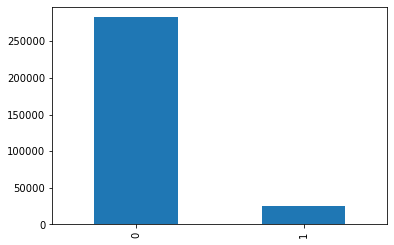

In [143]:
train['TARGET'].value_counts().plot.bar()

In [144]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [145]:
from sklearn.utils import resample

# Separate majority and minority classes
data_majority = train[train.TARGET==0]
data_minority = train[train.TARGET==1]
 
# Downsample majority class
df_majority_downsampled = resample(data_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=24825,   # to match minority class
                                   random_state=42)  # reproducible results
 
# Combine minority class with downsampled majority class
train = pd.concat([df_majority_downsampled, data_minority])
 
# Display new class counts
train.TARGET.value_counts()

0    24825
1    24825
Name: TARGET, dtype: int64

In [147]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler

In [152]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train.drop(columns=['TARGET']), train['TARGET'], stratify=train['TARGET'], 
                                                      test_size=0.7, random_state=42)


In [156]:
# 1. imputation
from sklearn.impute import SimpleImputer

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Fit on the training data
imputer.fit(x_train)

# Transform both training and testing data
x_train = imputer.transform(x_train)
x_valid = imputer.transform(x_valid)

In [158]:
# 2. scaling 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.fit_transform(x_valid)

In [160]:
# 3. PCA
pca = PCA()
x_train = pca.fit_transform(x_train)
x_valid = pca.transform(x_valid)

In [162]:
pca = PCA(n_components=40)
x_train = pca.fit_transform(x_train)
x_valid = pca.transform(x_valid)
pca.explained_variance_ratio_

array([0.24411002, 0.10876309, 0.06386759, 0.05658283, 0.0453382 ,
       0.02673779, 0.02399911, 0.02101278, 0.0198206 , 0.01887573,
       0.01679765, 0.01587966, 0.01485951, 0.01465198, 0.01418304,
       0.01330411, 0.01217313, 0.01189912, 0.01147359, 0.01109675,
       0.01052265, 0.010308  , 0.01023448, 0.01002154, 0.00971972,
       0.00937905, 0.00913929, 0.00885635, 0.00872992, 0.00863944,
       0.00835455, 0.00817747, 0.00810803, 0.00788561, 0.00778227,
       0.00759344, 0.00737974, 0.00707873, 0.00701003, 0.00680848])

Text(0, 0.5, 'proportion of variance explained')

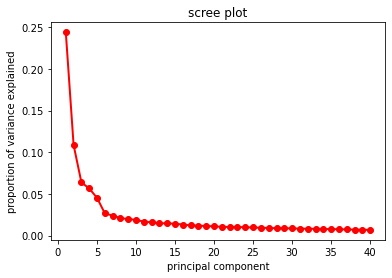

In [165]:
pc_values = np.arange(pca.n_components_)+1
plt.plot(pc_values, pca.explained_variance_ratio_,'ro-',linewidth=2)
plt.title('scree plot')
plt.xlabel('principal component')
plt.ylabel('proportion of variance explained')

## Model Building

#### Logistic Regression

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay

# Make the model with the specified regularization parameter
log_reg = LogisticRegression()

# Train on the training data
log_reg.fit(x_train, y_train)

log_reg_pred = log_reg.predict_proba(x_valid)

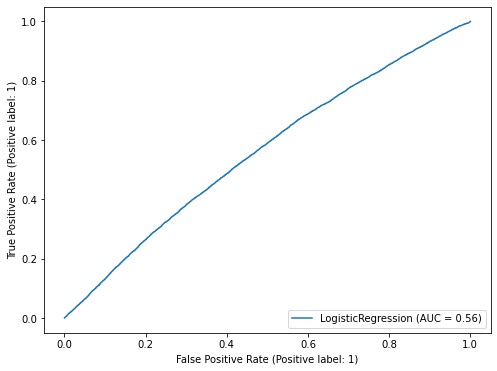

In [173]:
fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(log_reg, x_valid, y_valid, ax=ax)
plt.show()

In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline



pipeline_lr=Pipeline([("lr",LogisticRegression())])

pipeline_rf=Pipeline([("rf",RandomForestClassifier())])

pipeline_dt=Pipeline([("dt",DecisionTreeClassifier())])

pipeline_kn=Pipeline([("kn",KNeighborsClassifier())])

pipeline_svm=Pipeline([("svm",svm.SVC())])

# pipeline_xgb=Pipeline([("xgb",XGBRegressor())])



pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_svm]
pipe_dict = {0: "LinearRegression", 
             1: "DecisionTree", 
             2: "RandomForest",
             3: "KNeighbors",
             4: "SVM"}

In [189]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(x_train, y_train)


cv_results_roc_auc = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train,y_train,scoring="roc_auc", cv=10)
    cv_results_roc_auc.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: 0.693287 
DecisionTree: 0.548036 
RandomForest: 0.672150 
KNeighbors: 0.594020 
SVM: 0.692169 


## Merge More Sheets

In [282]:
# Calculate aggregate statistics for each numeric column
previous_agg = agg_numeric(previous_application, 'SK_ID_CURR')
print('Previous aggregation shape: ', previous_agg.shape)
previous_agg.head()

/var/folders/wp/6_zz4vgs79ndjls9bw_j54s80000gn/T/ipykernel_4066/2700363865.py:2: FutureWarning: ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg = df.groupby(group_var).agg(agg_funcs).reset_index()


Previous aggregation shape:  (338857, 101)


,SK_ID_CURR_,SK_ID_PREV_count,SK_ID_PREV_mean,SK_ID_PREV_max,SK_ID_PREV_min,SK_ID_PREV_sum,AMT_ANNUITY_count,AMT_ANNUITY_mean,AMT_ANNUITY_max,AMT_ANNUITY_min,...,DAYS_TERMINATION_count,DAYS_TERMINATION_mean,DAYS_TERMINATION_max,DAYS_TERMINATION_min,DAYS_TERMINATION_sum,NFLAG_INSURED_ON_APPROVAL_count,NFLAG_INSURED_ON_APPROVAL_mean,NFLAG_INSURED_ON_APPROVAL_max,NFLAG_INSURED_ON_APPROVAL_min,NFLAG_INSURED_ON_APPROVAL_sum
0,100001,1,1.369693e+06,1369693,1369693,1369693,1,3951.000,3951.000,3951.000,...,1,-1612.000000,-1612.0,-1612.0,-1612.0,1,0.000000,0.0,0.0,0.0
1,100002,1,1.038818e+06,1038818,1038818,1038818,1,9251.775,9251.775,9251.775,...,1,-17.000000,-17.0,-17.0,-17.0,1,0.000000,0.0,0.0,0.0
2,100003,3,2.281150e+06,2636178,1810518,6843451,3,56553.990,98356.995,6737.310,...,3,-1047.333333,-527.0,-1976.0,-3142.0,3,0.666667,1.0,0.0,2.0
3,100004,1,1.564014e+06,1564014,1564014,1564014,1,5357.250,5357.250,5357.250,...,1,-714.000000,-714.0,-714.0,-714.0,1,0.000000,0.0,0.0,0.0
4,100005,2,2.176837e+06,2495675,1857999,4353674,1,4813.200,4813.200,4813.200,...,1,-460.000000,-460.0,-460.0,-460.0,1,0.000000,0.0,0.0,0.0


In [283]:
# Calculate value counts for each categorical column
previous_counts = agg_categorical(previous_application, 'SK_ID_CURR')
print('Previous counts shape: ', previous_counts.shape)
previous_counts.head()

Previous counts shape:  (338857, 430)


,SK_ID_CURR_,NAME_CONTRACT_TYPE_Cash loans_sum,NAME_CONTRACT_TYPE_Cash loans_count,NAME_CONTRACT_TYPE_Cash loans_mean,NAME_CONTRACT_TYPE_Consumer loans_sum,NAME_CONTRACT_TYPE_Consumer loans_count,NAME_CONTRACT_TYPE_Consumer loans_mean,NAME_CONTRACT_TYPE_Revolving loans_sum,NAME_CONTRACT_TYPE_Revolving loans_count,NAME_CONTRACT_TYPE_Revolving loans_mean,...,PRODUCT_COMBINATION_POS mobile with interest_mean,PRODUCT_COMBINATION_POS mobile without interest_sum,PRODUCT_COMBINATION_POS mobile without interest_count,PRODUCT_COMBINATION_POS mobile without interest_mean,PRODUCT_COMBINATION_POS other with interest_sum,PRODUCT_COMBINATION_POS other with interest_count,PRODUCT_COMBINATION_POS other with interest_mean,PRODUCT_COMBINATION_POS others without interest_sum,PRODUCT_COMBINATION_POS others without interest_count,PRODUCT_COMBINATION_POS others without interest_mean
0,100001,0,1,0.000000,1,1,1.000000,0,1,0.0,...,1.0,0,1,0.0,0,1,0.0,0,1,0.0
1,100002,0,1,0.000000,1,1,1.000000,0,1,0.0,...,0.0,0,1,0.0,1,1,1.0,0,1,0.0
2,100003,1,3,0.333333,2,3,0.666667,0,3,0.0,...,0.0,0,3,0.0,0,3,0.0,0,3,0.0
3,100004,0,1,0.000000,1,1,1.000000,0,1,0.0,...,0.0,1,1,1.0,0,1,0.0,0,1,0.0
4,100005,1,2,0.500000,1,2,0.500000,0,2,0.0,...,0.5,0,2,0.0,0,2,0.0,0,2,0.0


In [285]:
previous_counts = previous_counts.rename(columns={'SK_ID_CURR_':'SK_ID_CURR'})
previous_counts.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE_Cash loans_sum,NAME_CONTRACT_TYPE_Cash loans_count,NAME_CONTRACT_TYPE_Cash loans_mean,NAME_CONTRACT_TYPE_Consumer loans_sum,NAME_CONTRACT_TYPE_Consumer loans_count,NAME_CONTRACT_TYPE_Consumer loans_mean,NAME_CONTRACT_TYPE_Revolving loans_sum,NAME_CONTRACT_TYPE_Revolving loans_count,NAME_CONTRACT_TYPE_Revolving loans_mean,...,PRODUCT_COMBINATION_POS mobile with interest_mean,PRODUCT_COMBINATION_POS mobile without interest_sum,PRODUCT_COMBINATION_POS mobile without interest_count,PRODUCT_COMBINATION_POS mobile without interest_mean,PRODUCT_COMBINATION_POS other with interest_sum,PRODUCT_COMBINATION_POS other with interest_count,PRODUCT_COMBINATION_POS other with interest_mean,PRODUCT_COMBINATION_POS others without interest_sum,PRODUCT_COMBINATION_POS others without interest_count,PRODUCT_COMBINATION_POS others without interest_mean
0,100001,0,1,0.000000,1,1,1.000000,0,1,0.0,...,1.0,0,1,0.0,0,1,0.0,0,1,0.0
1,100002,0,1,0.000000,1,1,1.000000,0,1,0.0,...,0.0,0,1,0.0,1,1,1.0,0,1,0.0
2,100003,1,3,0.333333,2,3,0.666667,0,3,0.0,...,0.0,0,3,0.0,0,3,0.0,0,3,0.0
3,100004,0,1,0.000000,1,1,1.000000,0,1,0.0,...,0.0,1,1,1.0,0,1,0.0,0,1,0.0
4,100005,1,2,0.500000,1,2,0.500000,0,2,0.0,...,0.5,0,2,0.0,0,2,0.0,0,2,0.0


In [286]:
previous_agg = previous_agg.rename(columns={'SK_ID_CURR_':'SK_ID_CURR'})
previous_agg.head()

,SK_ID_CURR,SK_ID_PREV_count,SK_ID_PREV_mean,SK_ID_PREV_max,SK_ID_PREV_min,SK_ID_PREV_sum,AMT_ANNUITY_count,AMT_ANNUITY_mean,AMT_ANNUITY_max,AMT_ANNUITY_min,...,DAYS_TERMINATION_count,DAYS_TERMINATION_mean,DAYS_TERMINATION_max,DAYS_TERMINATION_min,DAYS_TERMINATION_sum,NFLAG_INSURED_ON_APPROVAL_count,NFLAG_INSURED_ON_APPROVAL_mean,NFLAG_INSURED_ON_APPROVAL_max,NFLAG_INSURED_ON_APPROVAL_min,NFLAG_INSURED_ON_APPROVAL_sum
0,100001,1,1.369693e+06,1369693,1369693,1369693,1,3951.000,3951.000,3951.000,...,1,-1612.000000,-1612.0,-1612.0,-1612.0,1,0.000000,0.0,0.0,0.0
1,100002,1,1.038818e+06,1038818,1038818,1038818,1,9251.775,9251.775,9251.775,...,1,-17.000000,-17.0,-17.0,-17.0,1,0.000000,0.0,0.0,0.0
2,100003,3,2.281150e+06,2636178,1810518,6843451,3,56553.990,98356.995,6737.310,...,3,-1047.333333,-527.0,-1976.0,-3142.0,3,0.666667,1.0,0.0,2.0
3,100004,1,1.564014e+06,1564014,1564014,1564014,1,5357.250,5357.250,5357.250,...,1,-714.000000,-714.0,-714.0,-714.0,1,0.000000,0.0,0.0,0.0
4,100005,2,2.176837e+06,2495675,1857999,4353674,1,4813.200,4813.200,4813.200,...,1,-460.000000,-460.0,-460.0,-460.0,1,0.000000,0.0,0.0,0.0


In [289]:
train

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,DAYS_TERMINATION_count,DAYS_TERMINATION_mean,DAYS_TERMINATION_max,DAYS_TERMINATION_min,DAYS_TERMINATION_sum,NFLAG_INSURED_ON_APPROVAL_count,NFLAG_INSURED_ON_APPROVAL_mean,NFLAG_INSURED_ON_APPROVAL_max,NFLAG_INSURED_ON_APPROVAL_min,NFLAG_INSURED_ON_APPROVAL_sum
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,1.0,-17.000000,-17.0,-17.0,-17.0,1.0,0.000000,0.0,0.0,0.0
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,3.0,-1047.333333,-527.0,-1976.0,-3142.0,3.0,0.666667,1.0,0.0,2.0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,1.0,-714.000000,-714.0,-714.0,-714.0,1.0,0.000000,0.0,0.0,0.0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,4.0,182481.750000,365243.0,-416.0,729927.0,4.0,0.000000,0.0,0.0,0.0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,5.0,72143.800000,365243.0,-2041.0,360719.0,5.0,0.600000,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,...,1.0,-25.000000,-25.0,-25.0,-25.0,1.0,0.000000,0.0,0.0,0.0
307507,456252,0,0,1,0,72000.0,269550.0,12001.5,225000.0,0.025164,...,1.0,-2311.000000,-2311.0,-2311.0,-2311.0,1.0,1.000000,1.0,1.0,1.0
307508,456253,0,0,1,0,153000.0,677664.0,29979.0,585000.0,0.005002,...,2.0,-2212.500000,-1712.0,-2713.0,-4425.0,2.0,0.500000,1.0,0.0,1.0
307509,456254,0,0,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,...,2.0,365243.000000,365243.0,365243.0,730486.0,2.0,0.500000,1.0,0.0,1.0


In [ ]:
# Merge in the previous information
train = train.merge(previous_counts, on ='SK_ID_CURR', how = 'left')
train = train.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')

test = test.merge(previous_counts, on ='SK_ID_CURR', how = 'left')
test = test.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')

In [290]:
test

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,DAYS_TERMINATION_count,DAYS_TERMINATION_mean,DAYS_TERMINATION_max,DAYS_TERMINATION_min,DAYS_TERMINATION_sum,NFLAG_INSURED_ON_APPROVAL_count,NFLAG_INSURED_ON_APPROVAL_mean,NFLAG_INSURED_ON_APPROVAL_max,NFLAG_INSURED_ON_APPROVAL_min,NFLAG_INSURED_ON_APPROVAL_sum
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,1.0,-1612.000000,-1612.0,-1612.0,-1612.0,1.0,0.000000,0.0,0.0,0.0
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,1.0,-460.000000,-460.0,-460.0,-460.0,1.0,0.000000,0.0,0.0,0.0
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,3.0,-710.333333,-85.0,-1702.0,-2131.0,3.0,0.333333,1.0,0.0,1.0
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,3.0,121182.666667,365243.0,-1081.0,363548.0,3.0,0.000000,0.0,0.0,0.0
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,1.0,-449.000000,-449.0,-449.0,-449.0,1.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,1,0,121500.0,412560.0,17473.5,270000.0,0.002042,...,1.0,-591.000000,-591.0,-591.0,-591.0,1.0,1.000000,1.0,1.0,1.0
48740,456222,0,0,0,2,157500.0,622413.0,31909.5,495000.0,0.035792,...,4.0,-1019.500000,-43.0,-2087.0,-4078.0,4.0,0.500000,1.0,0.0,2.0
48741,456223,0,1,1,1,202500.0,315000.0,33205.5,315000.0,0.026392,...,2.0,182307.500000,365243.0,-628.0,364615.0,2.0,0.000000,0.0,0.0,0.0
48742,456224,0,0,0,0,225000.0,450000.0,25128.0,450000.0,0.018850,...,2.0,181622.500000,365243.0,-1998.0,363245.0,2.0,0.000000,0.0,0.0,0.0


### Downsampling and PCA for the Combined Four Datasets

In [291]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [292]:
from sklearn.utils import resample

# Separate majority and minority classes
data_majority = train[train.TARGET==0]
data_minority = train[train.TARGET==1]
 
# Downsample majority class
df_majority_downsampled = resample(data_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=24825,   # to match minority class
                                   random_state=42)  # reproducible results
 
# Combine minority class with downsampled majority class
train = pd.concat([df_majority_downsampled, data_minority])
 
# Display new class counts
train.TARGET.value_counts()

0    24825
1    24825
Name: TARGET, dtype: int64

In [367]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train.drop(columns=['TARGET']), train['TARGET'], stratify=train['TARGET'], 
                                                      test_size=0.7, random_state=42)

In [370]:
labels_train = x_train.columns.values
labels_train = labels_train.tolist()

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NON

In [361]:
# 1. imputation
from sklearn.impute import SimpleImputer

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Fit on the training data
imputer.fit(x_train)

# Transform both training and testing data
x_train = imputer.transform(x_train)
x_valid = imputer.transform(x_valid)

In [362]:
# 2. scaling 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.fit_transform(x_valid)

In [363]:
# 3. PCA
pca = PCA()
x_train = pca.fit_transform(x_train)
x_valid = pca.transform(x_valid)

In [364]:
pca = PCA(n_components=10)
x_train = pca.fit_transform(x_train)
x_valid = pca.transform(x_valid)
pca.explained_variance_ratio_

array([0.19446754, 0.06658212, 0.03152349, 0.01927931, 0.01862851,
       0.0164256 , 0.01354502, 0.01234804, 0.01015154, 0.00900693])

Text(0, 0.5, 'proportion of variance explained')

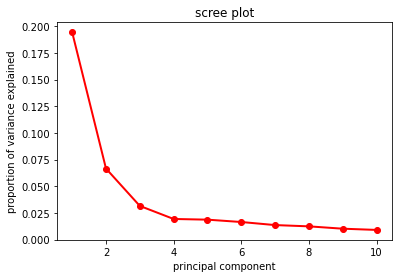

In [365]:
pc_values = np.arange(pca.n_components_)+1
plt.plot(pc_values, pca.explained_variance_ratio_,'ro-',linewidth=2)
plt.title('scree plot')
plt.xlabel('principal component')
plt.ylabel('proportion of variance explained')

In [328]:
x_train

array([[17.42392042,  0.28025955, -2.37770841, ...,  0.83819798,
        -0.46248132, -4.36511818],
       [-5.96759106,  3.70842044, -0.456032  , ..., -1.30651361,
         2.24420475,  0.07001785],
       [-4.22778911, -1.9870727 , -1.2738882 , ...,  0.15079127,
         1.22817718,  0.35213915],
       ...,
       [-8.39855395,  6.66701116, -2.70599973, ..., -4.23214171,
         0.1077119 ,  4.48275654],
       [ 1.44370358,  6.05409504, -3.73080207, ..., -7.02102162,
        -1.83504132, -1.58130277],
       [-1.01917738, -2.21406106, -1.529135  , ..., -2.48561584,
         4.42654959, -2.52236984]])

In [316]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.pipeline import Pipeline



pipeline_lr=Pipeline([("lr",LogisticRegression())])

pipeline_rf=Pipeline([("rf",RandomForestClassifier())])

pipeline_dt=Pipeline([("dt",DecisionTreeClassifier())])

pipeline_kn=Pipeline([("kn",KNeighborsClassifier())])

pipeline_svm=Pipeline([("svm",svm.SVC())])

pipeline_gbs=Pipeline([("gbs",GradientBoostingClassifier())])


# pipeline_xgb=Pipeline([("xgb",XGBRegressor())])



pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_svm, pipeline_gbs]
pipe_dict = {0: "LinearRegression", 
             1: "DecisionTree", 
             2: "RandomForest",
             3: "KNeighbors",
             4: "SVM",
             5: "gbs"}

In [317]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(x_train, y_train)


cv_results_roc_auc = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, 
                               x_train, 
                               y_train,scoring="roc_auc", 
                               cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1))
    cv_results_roc_auc.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: 0.643449 
DecisionTree: 0.540429 
RandomForest: 0.636845 
KNeighbors: 0.581545 
SVM: 0.650141 
gbs: 0.645764 
